# To do list:

- Step 1:  DownloaS&P50000 stocks price data.

- Step 2: Calculate different technical indicators and features for each stock.

- Step 3: Aggregate on monthly level and filter for for only top 150 most liquid stocks each month.

- Step 4: Claculate monthly returns for different time-horizons to add to features.

- Step 5: Download Fama-French Factors and calculate rolling factor betas for each stock.

- Step 6: For each month fit a K-means clustering model to group similar assets based on their features.

- Step 7: For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio portfolio optimisation.

- Step 8: Visualise the portfolio returns and compare to FTSE100 returns.

### Limitations:

We only use most recent FTSE100 stocks list meaning that there may be a survivorship bias in the list, in reality survivorship free data is recommended. (Could improve this model by supplying survirorship data).survirorship data).
g survirorship data).


## 1. Download FTSE100 stocks price data.

In [5]:
# Commented out most of code since the data has already been downloaded (new data wont keep being downloaded unless we want to).

'''
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
import matplotlib.pyplot as plt
import sklearn as skl
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
warnings.filterwarnings('ignore')

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0] # Loading S&P500 data (list of companies) from wikipedia. [0] indicates we are only interested in the first dataframe.

sp500['Symbol'] = sp500['Symbol'].str.replace('.', '-') # Making a list of all 'Symbol' column values and replacing table values with '.' in them to have a '-' sign instead. Avoids errors

symbols_list = sp500['Symbol'].unique().tolist() # Grabbing list of all stock sybols from the Symbols column and saving it to symbols_list variable.

symbols_list

# Downloading data

end_date = '2024-01-05' # Setting data end date.

start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8) # Setting data start date.

print(start_date)
print(end_date)

df = yf.download(tickers=symbols_list, start=start_date, end=end_date).stack() # Use downloads S&P500 data from ticker within specified start and end dates.


df.index.names = ['date', 'ticker'] # Assigning new multi-index names/labels to both index levels.


df.columns = df.columns.str.lower() # Adjust all the column name titles to lowercase.
'''

df


adj close       close        high         low        open  \
date       ticker                                                               
2016-01-07 A        37.058376   39.000000   40.150002   38.810001   40.139999   
           AAL      38.655853   40.450001   41.520000   39.680000   40.970001   
           AAPL     22.268383   24.112499   25.032499   24.107500   24.670000   
           ABBV     42.693176   57.209999   57.840000   56.340000   56.520000   
           ABT      36.956802   41.540001   42.180000   41.400002   41.680000   
...                       ...         ...         ...         ...         ...   
2024-01-04 YUM     128.690002  128.690002  129.619995  127.790001  128.399994   
           ZBH     120.199997  120.199997  120.879997  119.400002  119.900002   
           ZBRA    252.970001  252.970001  255.410004  250.529999  251.100006   
           ZION     42.639999   42.639999   43.040001   41.799999   42.009998   
           ZTS     194.039993  194.039993  194.929993  192.009995  192.850006   

                        volume  
date       ticker               
2016-01-07 A         3504300.0  
           AAL      11312900.0  
           AAPL    324377600.0  
           ABBV      9292600.0  
           ABT       7151400.0  
...                        ...  
2024-01-04 YUM       3019000.0  
           ZBH       2099400.0  
           ZBRA       358100.0  
           ZION      1950200.0  
           ZTS       1851900.0  

[994568 rows x 6 columns]

### Step 1 Finished

## 2. Calculate different technical indicators and features for each stock.

- Garman-Klass Volatility:

Garman-Klass Volatility is an approximation to measure the intraday volatility of a given asset. It's usually used in forex trading but can be used in stocks trading as well.

- RSI
- Bollinger Band
- ATR
- MACD
- Dollar Volume

In [18]:
# Garman-Klass Volatility

df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)

df

adj close       close        high         low        open  \
date       ticker                                                               
2016-01-07 A        37.058376   39.000000   40.150002   38.810001   40.139999   
           AAL      38.655853   40.450001   41.520000   39.680000   40.970001   
           AAPL     22.268383   24.112499   25.032499   24.107500   24.670000   
           ABBV     42.693176   57.209999   57.840000   56.340000   56.520000   
           ABT      36.956802   41.540001   42.180000   41.400002   41.680000   
...                       ...         ...         ...         ...         ...   
2024-01-04 YUM     128.690002  128.690002  129.619995  127.790001  128.399994   
           ZBH     120.199997  120.199997  120.879997  119.400002  119.900002   
           ZBRA    252.970001  252.970001  255.410004  250.529999  251.100006   
           ZION     42.639999   42.639999   43.040001   41.799999   42.009998   
           ZTS     194.039993  194.039993  194.929993  192.009995  192.850006   

                        volume  garman_klass_vol        rsi  
date       ticker                                            
2016-01-07 A         3504300.0         -0.001889        NaN  
           AAL      11312900.0         -0.000279        NaN  
           AAPL    324377600.0         -0.003343        NaN  
           ABBV      9292600.0         -0.030061        NaN  
           ABT       7151400.0         -0.005414        NaN  
...                        ...               ...        ...  
2024-01-04 YUM       3019000.0          0.000099  52.587077  
           ZBH       2099400.0          0.000073  61.720935  
           ZBRA       358100.0          0.000165  52.957281  
           ZION      1950200.0          0.000342  57.683294  
           ZTS       1851900.0          0.000099  60.083212  

[994568 rows x 8 columns]

<Axes: xlabel='date'>

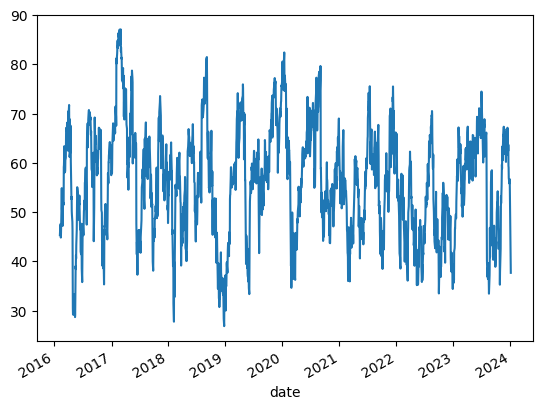

In [22]:
# RSI

df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20)) # Grouping the stocks by ticker (level 0 is the dates and level 1 is the ticker)

df.xs('AAPL', level=1)['rsi'].plot() # Plotting the RSI for APPLE stocks 

In [ ]:
# Bollinger Band

...